## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
##### Import Other Required Library ###########
import matplotlib.pyplot as plt
%matplotlib inline
sn.set() 
import math
from datetime import datetime
from sklearn.model_selection import train_test_split

In [25]:
# Reading the Stock 
df=pd.read_csv("^NSEI.csv")

In [9]:
# Getting the head of the data
df.head()

Date         Open         High          Low        Close  \
0  2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
1  2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2  2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
3  2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
4  2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

     Adj Close  Volume  
0  4494.649902     0.0  
1  4546.200195     0.0  
2  4732.350098     0.0  
3  4747.549805     0.0  
4  4837.549805     0.0

In [26]:
# Selecting Adj Close
df=df[['Date','Adj Close']]

In [11]:
df.sort_values(by='Date')

Date     Adj Close
0     2007-09-17   4494.649902
1     2007-09-18   4546.200195
2     2007-09-19   4732.350098
3     2007-09-20   4747.549805
4     2007-09-21   4837.549805
...          ...           ...
3066  2020-02-20  12080.849609
3067  2020-02-24  11829.400391
3068  2020-02-25  11797.900391
3069  2020-02-26  11678.500000
3070  2020-02-27  11633.299805

[3071 rows x 2 columns]

In [27]:
df.describe()

Adj Close
count   3039.000000
mean    7201.282316
std     2468.447937
min     2524.199951
25%     5261.425049
50%     6187.250000
75%     8826.625000
max    12362.299805

In [12]:
print(df.isnull().sum())

Date          0
Adj Close    32
dtype: int64


In [27]:
df_1=df

In [28]:
df_1['nulls']=df_1['Adj Close'].notnull() 
df_1.head(300)

Date    Adj Close  nulls
0    2007-09-17  4494.649902   True
1    2007-09-18  4546.200195   True
2    2007-09-19  4732.350098   True
3    2007-09-20  4747.549805   True
4    2007-09-21  4837.549805   True
..          ...          ...    ...
295  2008-11-27          NaN  False
296  2008-11-28  2755.100098   True
297  2008-12-01  2682.899902   True
298  2008-12-02  2657.800049   True
299  2008-12-03  2656.449951   True

[300 rows x 3 columns]

In [29]:
df_1[df_1['nulls']==False]

Date  Adj Close  nulls
295   2008-11-27        NaN  False
393   2009-04-30        NaN  False
507   2009-10-13        NaN  False
556   2009-12-23        NaN  False
557   2009-12-24        NaN  False
558   2009-12-29        NaN  False
559   2009-12-30        NaN  False
560   2009-12-31        NaN  False
585   2010-02-06        NaN  False
913   2011-05-31        NaN  False
1032  2011-11-24        NaN  False
1053  2011-12-26        NaN  False
1058  2012-01-02        NaN  False
1063  2012-01-07        NaN  False
1102  2012-03-03        NaN  False
1154  2012-05-21        NaN  False
1223  2012-08-28        NaN  False
1232  2012-09-08        NaN  False
1274  2012-11-11        NaN  False
1307  2013-01-01        NaN  False
1555  2014-01-01        NaN  False
1611  2014-03-22        NaN  False
1632  2014-04-24        NaN  False
1749  2014-10-15        NaN  False
1800  2015-01-01        NaN  False
1840  2015-02-28        NaN  False
1869  2015-04-15        NaN  False
2047  2016-01-01        NaN  False
2199  2016-08-12        NaN  False
2541  2018-01-01        NaN  False
2787  2019-01-01        NaN  False
2985  2019-10-27        NaN  False

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3071 non-null   object 
 1   Adj Close  3039 non-null   float64
 2   nulls      3071 non-null   bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 39.0+ KB


In [31]:
df_1['Date']=pd.to_datetime(df_1['Date'])

In [17]:
print(df_1.dtypes)

Date         datetime64[ns]
Adj Close           float64
nulls                  bool
dtype: object


In [32]:
df_1.set_index('Date', inplace=True)

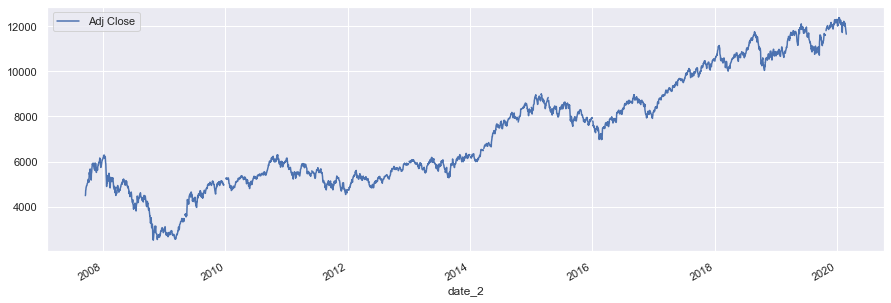

In [87]:
df_1.plot(grid=True, figsize=(15,5))

In [33]:
df_1.dropna() 

Adj Close  nulls
Date                           
2007-09-17   4494.649902   True
2007-09-18   4546.200195   True
2007-09-19   4732.350098   True
2007-09-20   4747.549805   True
2007-09-21   4837.549805   True
...                  ...    ...
2020-02-20  12080.849609   True
2020-02-24  11829.400391   True
2020-02-25  11797.900391   True
2020-02-26  11678.500000   True
2020-02-27  11633.299805   True

[3039 rows x 2 columns]

In [34]:
#### Generating a Sample Feature for your Reference 3period moving average
df_1['3MA']=df_1['Adj Close'].rolling(3).mean()
### shifting Feature 3MA  so that features at t-1 will be used to predict close at t
df_1['3MA']=df_1['3MA'].shift(1)

In [36]:
df_1['5MA']=df_1['Adj Close'].rolling(5).mean()
### shifting Feature 3MA  so that features at t-1 will be used to predict close at t
df_1['5MA']=df_1['5MA'].shift(1)

In [37]:
df_1.head(10)

Adj Close  nulls          3MA          5MA
Date                                                    
2007-09-17  4494.649902   True          NaN          NaN
2007-09-18  4546.200195   True          NaN          NaN
2007-09-19  4732.350098   True          NaN          NaN
2007-09-20  4747.549805   True  4591.066732          NaN
2007-09-21  4837.549805   True  4675.366699          NaN
2007-09-24  4932.200195   True  4772.483236  4671.659961
2007-09-25  4938.850098   True  4839.099935  4759.170020
2007-09-26  4940.500000   True  4902.866699  4837.700000
2007-09-27  5000.549805   True  4937.183431  4879.329981
2007-09-28  5021.350098   True  4959.966634  4929.929981

In [38]:
df_1['Lag_1']=df_1['Adj Close'].shift(1)
df_1['Lag_2']=df_1['Adj Close'].shift(2)
df_1['Lag_3']=df_1['Adj Close'].shift(3)
df_1['Lag_4']=df_1['Adj Close'].shift(4)
df_1['Lag_5']=df_1['Adj Close'].shift(5)
df_1['Lag_6']=df_1['Adj Close'].shift(6)
df_1['Lag_7']=df_1['Adj Close'].shift(7)


In [52]:
df_1['var_1day']=((df_1['Adj Close']/df_1['Lag_1'])-1)*100
df_1['var_5day']=((df_1['Adj Close']/df_1['Lag_5'])-1)*100
df_1['var_7day']=((df_1['Adj Close']/df_1['Lag_7'])-1)*100


In [53]:
df_1.corr()

Adj Close     nulls       3MA       5MA     Lag_1     Lag_2  \
Adj Close   1.000000       NaN  0.999146  0.998791  0.999494  0.998915   
nulls            NaN  1.000000  0.030130  0.024864  0.029075  0.032301   
3MA         0.999146  0.030130  1.000000  0.999838  0.999702  0.999895   
5MA         0.998791  0.024864  0.999838  1.000000  0.999339  0.999678   
Lag_1       0.999494  0.029075  0.999702  0.999339  1.000000  0.999494   
Lag_2       0.998915  0.032301  0.999895  0.999678  0.999494  1.000000   
Lag_3       0.998334  0.034072  0.999702  0.999794  0.998915  0.999494   
Lag_4       0.997799  0.036501  0.999142  0.999677  0.998333  0.998914   
Lag_5       0.997288  0.034202  0.998574  0.999335  0.997803  0.998336   
Lag_6       0.996816  0.039301  0.998027  0.998784  0.997292  0.997806   
Lag_7       0.996381  0.038047  0.997513  0.998234  0.996816  0.997292   
var_1day    0.016022       NaN -0.014615 -0.010378 -0.013330 -0.015133   
var_5day    0.037484       NaN  0.013682  0.000626  0.025760  0.011622   
var_7day    0.043507       NaN  0.026042  0.017356  0.035320  0.024312   

              Lag_3     Lag_4     Lag_5     Lag_6     Lag_7  var_1day  \
Adj Close  0.998334  0.997799  0.997288  0.996816  0.996381  0.016022   
nulls      0.034072  0.036501  0.034202  0.039301  0.038047       NaN   
3MA        0.999702  0.999142  0.998574  0.998027  0.997513 -0.014615   
5MA        0.999794  0.999677  0.999335  0.998784  0.998234 -0.010378   
Lag_1      0.998915  0.998333  0.997803  0.997292  0.996816 -0.013330   
Lag_2      0.999494  0.998914  0.998336  0.997806  0.997292 -0.015133   
Lag_3      1.000000  0.999493  0.998915  0.998337  0.997805 -0.015010   
Lag_4      0.999493  1.000000  0.999494  0.998917  0.998336 -0.011579   
Lag_5      0.998915  0.999494  1.000000  0.999494  0.998915 -0.008626   
Lag_6      0.998337  0.998917  0.999494  1.000000  0.999493 -0.010615   
Lag_7      0.997805  0.998336  0.998915  0.999493  1.000000 -0.005342   
var_1day  -0.015010 -0.011579 -0.008626 -0.010615 -0.005342  1.000000   
var_5day  -0.002451 -0.016910 -0.030655 -0.028449 -0.024149  0.419664   
var_7day   0.011241 -0.000123 -0.010084 -0.022920 -0.035335  0.339894   

           var_5day  var_7day  
Adj Close  0.037484  0.043507  
nulls           NaN       NaN  
3MA        0.013682  0.026042  
5MA        0.000626  0.017356  
Lag_1      0.025760  0.035320  
Lag_2      0.011622  0.024312  
Lag_3     -0.002451  0.011241  
Lag_4     -0.016910 -0.000123  
Lag_5     -0.030655 -0.010084  
Lag_6     -0.028449 -0.022920  
Lag_7     -0.024149 -0.035335  
var_1day   0.419664  0.339894  
var_5day   1.000000  0.827317  
var_7day   0.827317  1.000000

In [56]:
development=df_1['2007':'2018']
development.head()
development=development.dropna()

In [57]:
development.columns

Index(['Adj Close', 'nulls', '3MA', '5MA', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4',
       'Lag_5', 'Lag_6', 'Lag_7', 'var_1day', 'var_5day', 'var_7day'],
      dtype='object')

In [58]:
# Train Test Split  data (Make sure to consider the data is a time series data)
X=development[['3MA', '5MA', 'Lag_1', 'Lag_2','Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7','var_1day', 'var_5day', 'var_7day']]
y= development['Adj Close']
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=200)

In [45]:
len(x_train)

2059

In [46]:
len(x_test)

515

In [67]:
# Train different Algorithms
import statsmodels.api as sm
x_train_intercep=sm.add_constant(x_train)
model=sm.OLS(y_train, x_train_intercep)
results=model.fit()

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.313e+06
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:56:29   Log-Likelihood:                -9713.6
No. Observations:                2059   AIC:                         1.945e+04
Df Residuals:                    2048   BIC:                         1.951e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4275      1.981     -1.730      0.084      -7.313       0.458
3MA            0.2352      0.003     70.276      0.000       0.229       0.242
5MA            0.1228      0.003     44.165      0.000       0.117       0.128
Lag_1          0.9094      0.012     75.251      0.000       0.886       0.933
Lag_2         -0.0896      0.012     -7.733      0.000      -0.112      -0.067
Lag_3         -0.1141      0.011    -10.458      0.000      -0.136      -0.093
Lag_4         -0.0246      0.011     -2.174      0.030      -0.047      -0.002
Lag_5         -0.0672      0.020     -3.393      0.001      -0.106      -0.028
Lag_6          0.0035      0.012      0.304      0.761      -0.019       0.026
Lag_7          0.0252      0.016      1.563      0.118      -0.006       0.057
var_1day      50.4855      0.713     70.776      0.000      49.087      51.884
var_5day      -1.5883      0.955     -1.663      0.096      -3.461       0.285
var_7day       0.9604      0.800      1.201      0.230      -0.608       2.529
==============================================================================
Omnibus:                      498.763   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11735.384
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                      14.641   Cond. No.                     4.85e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
x_train_intercep.columns

Index(['const', '3MA', '5MA', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
       'Lag_6', 'Lag_7', 'var_1day', 'var_5day', 'var_7day'],
      dtype='object')

In [87]:
x_train_intercep.head(10)

const          3MA          5MA        Lag_1        Lag_2  \
Date                                                                    
2016-05-20    1.0  7848.099935  7843.989941  7783.399902  7870.149902   
2011-08-25    1.0  4912.199870  4905.279883  4888.899902  4948.899902   
2015-10-09    1.0  8153.216634  8105.969922  8129.350098  8177.399902   
2008-03-18    1.0  4624.166667  4722.079981  4503.100098  4745.799805   
2009-03-26    1.0  2954.316650  2895.429980  2984.350098  2938.699951   
2015-07-03    1.0  8422.150065  8393.190039  8444.900391  8453.049805   
2010-09-06    1.0  5479.133301  5451.050000  5479.399902  5486.149902   
2008-09-24    1.0  4198.399902  4128.319922  4126.899902  4223.049805   
2016-03-30    1.0  7642.866699  7669.550000  7597.000000  7615.100098   
2015-05-18    1.0  8240.666666  8234.840039  8262.349609  8224.200195   

                  Lag_3        Lag_4        Lag_5        Lag_6        Lag_7  \
Date                                                                          
2016-05-20  7890.750000  7860.750000  7814.899902  7900.399902  7848.850098   
2011-08-25  4898.799805  4845.649902  4944.149902  5056.600098  5035.799805   
2015-10-09  8152.899902  8119.299805  7950.899902  7948.899902  7843.299805   
2008-03-18  4623.600098  4872.000000  4865.899902  4800.399902  4771.600098   
2009-03-26  2939.899902  2807.050049  2807.149902  2794.699951  2757.449951   
2015-07-03  8368.500000  8318.400391  8381.099609  8398.000000  8360.849609   
2010-09-06  5471.850098  5402.399902  5415.450195  5408.700195  5477.899902   
2008-09-24  4245.250000  4038.149902  4008.250000  4074.899902  4072.899902   
2016-03-30  7716.500000  7714.899902  7704.250000  7604.350098  7512.549805   
2015-05-18  8235.450195  8126.950195  8325.250000  8191.500000  8057.299805   

            var_1day  var_5day   var_7day  
Date                                       
2016-05-20 -0.432969 -0.834300  -1.263241  
2011-08-25 -1.008403 -2.114616  -3.896098  
2015-10-09  0.742373  3.003437   4.416513  
2008-03-18  0.663985 -6.841487  -5.000421  
2009-03-26  3.280443  9.799979  11.779001  
2015-07-03  0.473659  1.238510   1.483710  
2010-09-06  1.780310  2.982208   1.808180  
2008-09-24  0.832346  3.817127   2.169218  
2016-03-30  1.819142  0.401729   2.963713  
2015-05-18  1.347084  0.581369   3.926261

In [65]:
x_train_2=x_train_intercep[['const','3MA','Lag_1','var_7day']]

In [69]:
model_1=sm.OLS(y_train, x_train_2)
results1=model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.174e+05
Date:                Tue, 15 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:56:35   Log-Likelihood:                -11733.
No. Observations:                2059   AIC:                         2.347e+04
Df Residuals:                    2055   BIC:                         2.350e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5686      5.255      0.108      0.914      -9.738      10.875
3MA            0.1569      0.031      5.045      0.000       0.096       0.218
Lag_1          0.8431      0.031     27.137      0.000       0.782       0.904
var_7day       8.3671      0.482     17.374      0.000       7.423       9.311
==============================================================================
Omnibus:                      210.948   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1348.820
Skew:                           0.237   Prob(JB):                    1.28e-293
Kurtosis:                       6.937   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
x_test_intercep=sm.add_constant(x_test)
y_predict=results.predict(x_test_intercep)

In [91]:
x_test_2=x_test[['3MA','Lag_1','var_7day']]
x_test_intercep2=sm.add_constant(x_test_2)
y1_predict=results1.predict(x_test_intercep2)

In [93]:
# Test performance of the model on the Testing Data using RMSE

from sklearn.metrics import mean_absolute_error #métrica
from statsmodels.tools.eval_measures import mse, rmse #métricas
 #MAE
print("Mean Absolute Error for model:{}". format(mean_absolute_error(y_test,y_predict)))
print("Mean Absolute Error for model1:{}". format(mean_absolute_error(y_test,y1_predict)))
 # MSE
print("Mean Squared Error for model:{}".format(mse(y_test, y_predict)))
print("Mean Squared Error dor model1:{}".format(mse(y_test, y1_predict)))
#RMSE
print("Mean Absolute Perc Error for model:{}". format(np.mean(np.abs((y_test - y_predict) / y_test)) * 100))
print("Mean Absolute Perc Error for model1:{}". format(np.mean(np.abs((y_test - y1_predict) / y_test)) * 100))

Mean Absolute Error for model:15.735319976045682
Mean Absolute Error for model1:54.48145774300614
Mean Squared Error for model:663.5903683199318
Mean Squared Error dor model1:5219.134135982349
Mean Absolute Perc Error for model:0.24375587090074916
Mean Absolute Perc Error for model1:0.914905715943999


In [94]:
# Random Forest regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=5)
model_forest = forest.fit(x_train, y_train.values.ravel())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
predictions_forest = forest.predict(x_test)
errors_forest = (predictions_forest - y_test.values)**2
RMSE_forest = round(math.sqrt(np.mean(errors_forest)), 1)
print('Random Forest RMSE:', RMSE_forest)


Random Forest RMSE: 44.4
